In [2]:
import pandas as pd
import numpy as np

In [3]:
orig_data_train = pd.read_csv("C:/Users/Kshitij96/Python_Work/MercedesBenz_Prj/Dataset/train/train.csv")
orig_data_train

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [4]:
orig_data_test = pd.read_csv("C:/Users/Kshitij96/Python_Work/MercedesBenz_Prj/Dataset/test/test.csv")
orig_data_test

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0


In [5]:
variances = orig_data_train.var(axis=0)
var_zero = variances[variances==0]
var_zero

X11     0.0
X93     0.0
X107    0.0
X233    0.0
X235    0.0
X268    0.0
X289    0.0
X290    0.0
X293    0.0
X297    0.0
X330    0.0
X347    0.0
dtype: float64

In [11]:
#1. Drop variables with variance = 0, train.csv
target_data_train = orig_data_train['y']

#Column ID is also not needed to explain 'y'
dataset_train1=orig_data_train.drop(columns = ['ID','y'])
dataset_train1=dataset_train1.drop(columns = variances[variances==0].index)
dataset_train1

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,j,o,t,d,d,aa,h,h,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,ak,v,r,a,d,aa,g,e,0,1,...,0,0,1,0,0,0,0,0,0,0
4207,al,r,e,f,d,aa,l,u,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#1. Drop variables with variance = 0 found in train.csv, in the test.csv as well

dataset_test1=orig_data_test.drop(columns = ['ID'])
dataset_test1=dataset_test1.drop(columns = var_zero.index)
dataset_test1

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
3,az,l,n,f,d,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
4,w,s,as,c,d,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,aj,h,as,f,d,aa,j,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,t,aa,ai,d,d,aa,j,y,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,y,v,as,f,d,aa,d,w,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,ak,v,as,a,d,aa,c,q,0,0,...,0,0,1,0,0,0,0,0,0,0


In [13]:
#2. Check for null values in train data

loc = dataset_train1.isna().any()
missing_val_train = loc[loc==True]
missing_val_train

Series([], dtype: bool)

In [14]:
#2. Check for null values in test data

loc = dataset_test1.isna().any()
missing_val_test = loc[loc==True]
missing_val_test

Series([], dtype: bool)

In [15]:
if len(missing_val_train)==0 and len(missing_val_test)==0:
    print('No missing values in both the datasets')

No missing values in both the datasets


In [17]:
#2. Check for unique values in TRAIN data

col=dataset_train1.columns
first = True
for i in col:
    if first == True:
        df_uniq = pd.DataFrame(dataset_train1[i].unique())
        first=False
    else:
        df1 = pd.DataFrame(dataset_train1[i].unique())
        df_uniq = pd.concat([df_uniq,df1],axis=1)
df_uniq.columns = col
df_uniq

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,az,t,av,e,b,y,l,x,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,t,w,n,c,c,x,d,e,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,al,b,e,f,a,h,h,n,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,o,r,as,d,NaN,g,i,s,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,w,l,aq,b,NaN,f,a,a,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,j,s,r,g,NaN,j,g,h,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,h,aa,ai,NaN,NaN,i,c,p,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,s,c,ak,NaN,NaN,d,k,m,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,n,a,m,NaN,NaN,c,e,k,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#2. Check for unique values in TEST data

col=dataset_test1.columns
first = True
for i in col:
    if first == True:
        df_uniq = pd.DataFrame(dataset_test1[i].unique())
        first=False
    else:
        df1 = pd.DataFrame(dataset_test1[i].unique())
        df_uniq = pd.concat([df_uniq,df1],axis=1)
df_uniq.columns = col
df_uniq

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,az,v,n,f,d,t,a,w,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,t,b,ai,a,b,b,g,y,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,w,l,as,c,a,a,j,j,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,y,s,ae,e,c,z,l,n,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,x,aa,s,d,NaN,y,i,m,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,f,r,b,g,NaN,x,d,s,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ap,a,e,b,NaN,h,f,a,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,o,i,ak,NaN,NaN,g,h,v,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ay,p,m,NaN,NaN,f,c,r,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,al,c,a,NaN,NaN,j,k,o,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#3. Apply Label Encoder

from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()

dattyp = dataset_train1.dtypes
col = dattyp.index
for i in col:
    if dattyp[i] == object:
        dataset_train1[i]=lab_enc.fit_transform(dataset_train1[i])
        
dataset_train2 = dataset_train1
dataset_train2

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,31,16,40,3,3,0,7,7,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,8,23,38,0,3,0,6,4,0,1,...,0,0,1,0,0,0,0,0,0,0
4207,9,19,25,5,3,0,11,20,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#4. Dimensionality Reduction
#Obtain the top features that explain the column 'y' well
variances = dataset_train2.var(axis=0)
dataset_train3=dataset_train2.drop(columns = variances[variances<0.245].index)
dataset_train3

,X0,X1,X2,X3,X5,X6,X8,X127,X178,X186,X191,X194,X220,X223,X250,X314,X329,X334,X337,X362
0,32,23,17,0,24,9,14,0,0,0,0,1,1,0,0,0,1,1,0,0
1,32,21,19,4,28,11,14,1,1,0,0,1,0,0,1,0,1,0,1,0
2,20,24,34,2,27,9,23,0,0,0,0,1,1,1,1,0,0,1,0,0
3,20,21,34,5,27,11,4,0,0,0,0,1,1,1,1,0,0,0,0,0
4,20,23,34,5,12,3,13,0,0,0,0,1,1,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8,20,16,2,0,3,16,0,0,0,1,1,0,1,0,1,1,0,1,0
4205,31,16,40,3,0,7,7,0,0,1,0,0,0,0,0,1,0,1,0,0
4206,8,23,38,0,0,6,4,0,1,0,0,1,1,0,1,1,1,1,0,0
4207,9,19,25,5,0,11,20,1,1,1,0,0,0,1,1,0,0,0,1,1


In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

%matplotlib inline

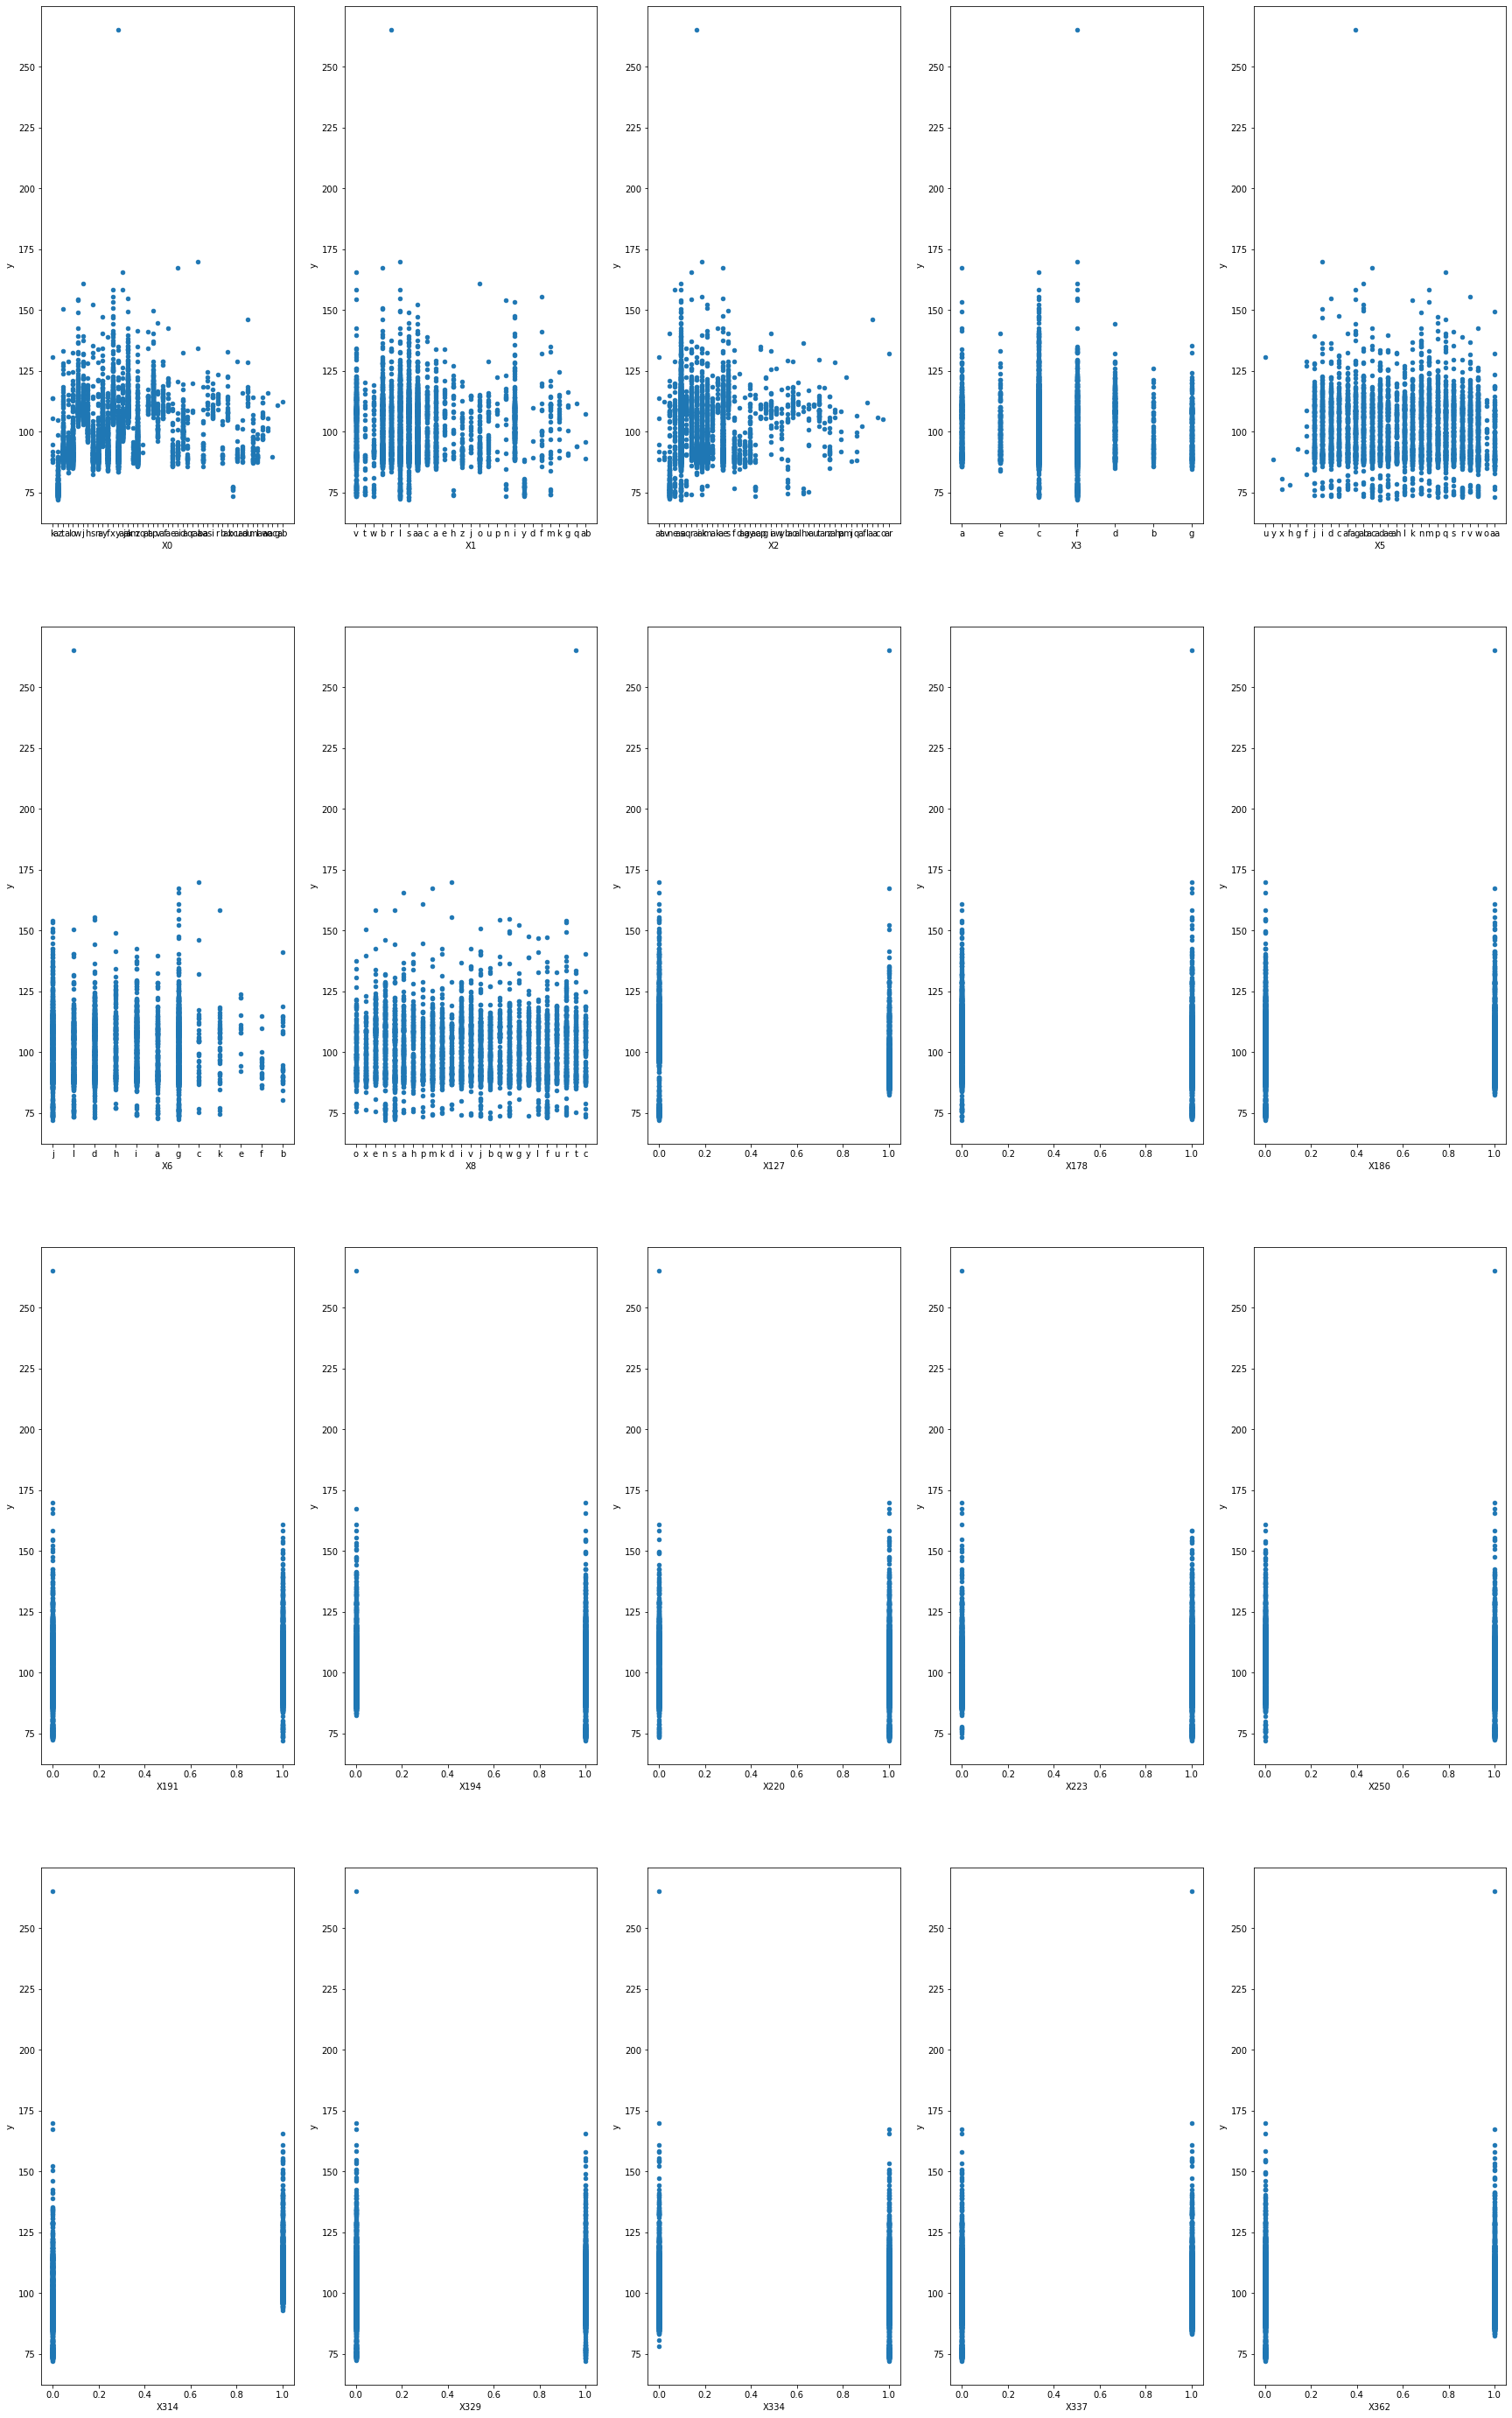

In [32]:
#Relationship for top 20 features based on variances
temp = dataset_train3.columns
i=0


fig,axs = plt.subplots(4,5)
for j in range (0,4):
    for k in range (0,5):
        orig_data_train.plot(kind='scatter',x=temp[i],y='y',ax=axs[j,k],figsize=(30,50))
        i = i+1


In [55]:
#Assign x & y for Regression
from sklearn.model_selection import train_test_split

x=dataset_train3
y=target_data_train

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=32)

In [56]:
from xgboost import XGBRegressor
from sklearn import model_selection

In [106]:
model = XGBRegressor(n_estimators=8,random_state=30)

In [107]:
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=8, n_jobs=4, num_parallel_tree=1, random_state=30,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
kfold = model_selection.RepeatedKFold(n_splits=10, n_repeats=3, random_state=31)

In [109]:
scores = model_selection.cross_val_score(model,x_train,y_train,scoring='neg_mean_absolute_error',cv=kfold,n_jobs=-1)

In [110]:
scores = abs(scores)
print(scores.mean())
print(scores.std())

6.400241858162212
0.4207604565057041


In [111]:
y_pred = model.predict(x_test)

In [112]:
scores = model_selection.cross_val_score(model,x_test,y_pred,scoring='neg_mean_absolute_error',cv=kfold,n_jobs=-1)

In [113]:
scores = abs(scores)
print(scores.mean())
print(scores.std())

5.53651876449585
0.1646515810805689


In [115]:
#We achieve the closest scores between train & test data among the split within train.csv dataset

In [126]:
#Reduce test.csv dataset to the prominent features as determined for train.csv
#Preparation of actual x_test

#Label encoding needs to be same for both datasets. Hence, combine !

comb_ds = pd.concat([orig_data_train,orig_data_test],axis=0)
comb_ds.shape

(8418, 378)

In [127]:
comb_ds

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,NaN,aj,h,as,f,d,aa,j,e,...,0,0,0,0,0,0,0,0,0,0
4205,8411,NaN,t,aa,ai,d,d,aa,j,y,...,0,1,0,0,0,0,0,0,0,0
4206,8413,NaN,y,v,as,f,d,aa,d,w,...,0,0,0,0,0,0,0,0,0,0
4207,8414,NaN,ak,v,as,a,d,aa,c,q,...,0,0,1,0,0,0,0,0,0,0


In [128]:
lab_enc = preprocessing.LabelEncoder()

dattyp = comb_ds.dtypes
col = dattyp.index
for i in col:
    if dattyp[i] == object:
        comb_ds[i]=lab_enc.fit_transform(comb_ds[i])
        
comb_ds2 = comb_ds
comb_ds2

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,37,23,20,0,3,27,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,37,21,22,4,3,31,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,24,24,38,2,3,30,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,24,21,38,5,3,30,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,24,23,38,5,3,14,3,13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,NaN,9,9,19,5,3,1,9,4,...,0,0,0,0,0,0,0,0,0,0
4205,8411,NaN,46,1,9,3,3,1,9,24,...,0,1,0,0,0,0,0,0,0,0
4206,8413,NaN,51,23,19,5,3,1,3,22,...,0,0,0,0,0,0,0,0,0,0
4207,8414,NaN,10,23,19,0,3,1,2,16,...,0,0,1,0,0,0,0,0,0,0


In [132]:
#Perform the XGBoost Regression as decided earlier for the first half of data, which is essentially train.csv
#Because, the label encoding might be varied for combined dataset


train = comb_ds2.iloc[0:4209,:]
train

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,37,23,20,0,3,27,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,37,21,22,4,3,31,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,24,24,38,2,3,30,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,24,21,38,5,3,30,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,24,23,38,5,3,14,3,13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,10,20,19,2,3,1,3,16,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,36,16,44,3,3,1,7,7,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,10,23,42,0,3,1,6,4,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,11,19,29,5,3,1,11,20,...,0,0,0,0,0,0,0,0,0,0


In [145]:
#Performing XGBRegression on newly encoded train data and checking for accuracy
x=train.iloc[:,2:]
y=train.iloc[:,1]

x=x[dataset_train3.columns]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=32)

In [146]:
model = XGBRegressor(n_estimators=8,random_state=30)
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=8, n_jobs=4, num_parallel_tree=1, random_state=30,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [147]:
kfold = model_selection.RepeatedKFold(n_splits=10, n_repeats=3, random_state=31)
scores = model_selection.cross_val_score(model,x_train,y_train,scoring='neg_mean_absolute_error',cv=kfold,n_jobs=-1)
scores = abs(scores)
print(scores.mean())
print(scores.std())

6.400141354883376
0.4208294940516239


In [148]:
y_pred = model.predict(x_test)
scores = model_selection.cross_val_score(model,x_test,y_pred,scoring='neg_mean_absolute_error',cv=kfold,n_jobs=-1)
scores = abs(scores)
print(scores.mean())
print(scores.std())

C:\Users\Kshitij96\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


5.53651876449585
0.1646515810805689


In [149]:
#Now predict the actual df_test of test.csv

temp = comb_ds2.iloc[4209:,:]

df_test = temp[dataset_train3.columns]
df_test

,X0,X1,X2,X3,X5,X6,X8,X127,X178,X186,X191,X194,X220,X223,X250,X314,X329,X334,X337,X362
0,24,23,38,5,26,0,22,0,0,0,0,1,1,1,1,0,0,1,0,0
1,46,3,9,0,9,6,24,1,0,1,0,0,0,0,1,0,0,1,0,1
2,24,23,19,5,0,9,9,0,0,0,1,1,0,1,0,0,1,1,0,0
3,24,13,38,5,32,11,13,0,0,0,0,1,1,1,1,0,0,1,0,0
4,49,20,19,2,31,8,12,0,0,0,1,1,1,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,9,9,19,5,1,9,4,0,0,0,1,1,1,1,0,1,0,0,1,0
4205,46,1,9,3,1,9,24,1,1,1,0,0,0,0,1,0,1,1,0,1
4206,51,23,19,5,1,3,22,1,0,1,1,0,1,1,0,0,0,0,1,1
4207,10,23,19,0,1,2,16,0,0,0,1,1,1,1,0,1,1,1,0,0


In [158]:
y_pred = model.predict(df_test)
y_pred

array([ 72.93851 ,  89.219246,  73.843155, ...,  87.75219 , 102.53739 ,
        88.16947 ], dtype=float32)

In [171]:
#5. Final predictions for test.csv are as follows

orig_data_test['y']=y_pred
orig_data_test

,y,ID,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,72.938507,1,az,v,n,f,d,t,a,w,...,0,0,0,1,0,0,0,0,0,0
1,89.219246,2,t,b,ai,a,d,b,g,y,...,0,0,1,0,0,0,0,0,0,0
2,73.843155,3,az,v,as,f,d,a,j,j,...,0,0,0,1,0,0,0,0,0,0
3,73.273560,4,az,l,n,f,d,z,l,n,...,0,0,0,1,0,0,0,0,0,0
4,109.674622,5,w,s,as,c,d,y,i,m,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,97.309128,8410,aj,h,as,f,d,aa,j,e,...,0,0,0,0,0,0,0,0,0,0
4205,87.881195,8411,t,aa,ai,d,d,aa,j,y,...,0,1,0,0,0,0,0,0,0,0
4206,87.752190,8413,y,v,as,f,d,aa,d,w,...,0,0,0,0,0,0,0,0,0,0
4207,102.537392,8414,ak,v,as,a,d,aa,c,q,...,0,0,1,0,0,0,0,0,0,0
